> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

A base de dados que irei utilizar é a base de dados No-show appointments. Esta base de dados possui dados de agendamentos de consultas médicas no Brasil. A base de dados possui informações do dia do agendamento, localização do hospital, idade do paciente, problemas de saúde do paciente, se o paciente foi lembrado ou não da consulta e se o paciente foi ou não a consulta. Já é descrito no repositório da base de dados que os pacientes femininos são marioria, pois se preocupam mais com a saúde. Diante destas informações, esta análise busca responde as seguintes perguntas:

<ol>
<li>Há uma faixa etária entre os sexos que é mais assídua?</li>
<li>O envio das mensagem lembrete contribui para comparecer ao compromisso?</li>
<li>Que tipo de problema de saúde marcam mais consultas? E quais são mais assíduas?</li>
<li>Que dia e para qual dia da semana mais são marcadas as consultas? Que dia há menos falta do compromisso?</li>
<li>Quantos pacientes possuem bolsa família? Como é a assiudade deles?</li>
<li>Quais as doenças mais frequentes?</li>
<li>Tempo médio entre a data de agendamento e a data da consulta</li>
<li>Dia da semana que mais ocorrem os agendamentos e as consultas</li>
<li>Há um bairro que recebe mais pacientes com um determinado tipo de doença?</li>
<li>Há doenças relacionadas à idade?</li>
</ol>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('../no_showup/no_show_2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### Valores faltando
Não há valores faltando em nenhuma das variáveis.

#### PatientID
Como os pacientes podem ter marcados mais de uma consulta e o PatientID está como numérico, então vou transformar em String porque não será usado nenhuma operação matemática e melhor para exibir os valores. Mais a frente será realizada uma busca para identificar se há valores repetidos para essa variável.

#### ScheduledDay e AppointmentID
Esta variável será dividia em Ano, Mês, Dia, Dia da Semana e Horário.

#### Age
Pssui valor máximo de 115 anos e mínimo de -1. Há possibilidade da pessoa ter 115 anos, dificilmente mas tem. Esta instância será investigada para identificar se é a idade real ou se foi um erro.
Idade negativa é impossível. Esta instância pode ser desconsiderada, pois não há como identificar o real valor. Será realizada uma investigação para identificar se há mais valores inesperados.

#### Handcap	
Os valores esperados nesta variável são 0 e 1, foi identificado que há o valor máximo é 4.


### Convertendo PatientID para String

In [7]:
df['PatientId'] = df['PatientId'].map(lambda x: '{:.0f}'.format(x))

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df['PatientId'].nunique()

62299

In [47]:
df['AppointmentID'].nunique()

110527

***PatientId*** possui quantidade de valores diferente do número de instâncias, isso significa que há pacientes que marcaram mais uma consulta. Enquanto que ***AppointmentID*** possui a quantidade de valores igual ao de instâncias, significando que é um valor diferente para cada consulta. Inicialmente esta variável é apenas o identificar das consultas e não apresenta informação adicional, então ela será removida.

### Remoção de AppointmentID

In [10]:
df.drop('AppointmentID',inplace=True,axis=1)

In [11]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Gender

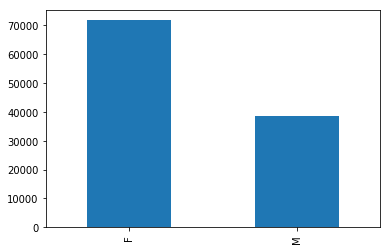

In [52]:
df['Gender'].value_counts().plot(kind='bar')

### Removendo os pacientes repetidos

In [13]:
patient_ids = df.drop_duplicates(subset='PatientId')

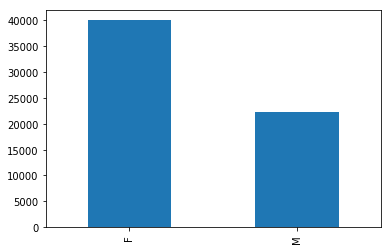

In [14]:
patient_ids['Gender'].value_counts().plot(kind='bar')

Como há mais de uma consulta do mesmo paciente, foi mantida apenas uma instância de cada paciente. Comparando os gráficos é possível identificar que a proporção de consultadas marcadas para cada gênero se mantém a mesma.

In [69]:
df['Gender'].value_counts()/df['Gender'].value_counts().sum()

F    0.649977
M    0.350023
Name: Gender, dtype: float64

In [70]:
patient_ids['Gender'].value_counts()/patient_ids['Gender'].value_counts().sum()

F    0.642803
M    0.357197
Name: Gender, dtype: float64

### Separando as datas de ScheduledDay e AppointmentDay	

In [15]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(4)
memory usage: 11.0+ MB


In [16]:
df['s_day'] = df['ScheduledDay'].apply(lambda x:x.day)
df['s_month'] = df['ScheduledDay'].apply(lambda x:x.month)
df['s_year'] = df['ScheduledDay'].apply(lambda x:x.year)
df['s_hour'] = df['ScheduledDay'].apply(lambda x:x.hour)

In [17]:
df['a_day'] = df['AppointmentDay'].apply(lambda x:x.day)
df['a_month'] = df['AppointmentDay'].apply(lambda x:x.month)
df['a_year'] = df['AppointmentDay'].apply(lambda x:x.year)
df['a_hour'] = df['AppointmentDay'].apply(lambda x:x.hour)

In [18]:
df['s_weekday'] = df['ScheduledDay'].apply(lambda x:x.day_name())
df['a_weekday'] = df['AppointmentDay'].apply(lambda x:x.day_name())

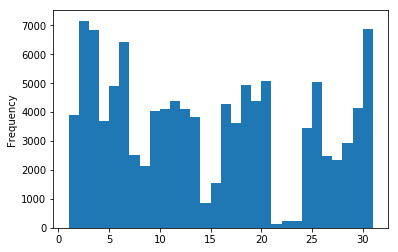

In [93]:
df['s_day'].plot.hist(bins=30)

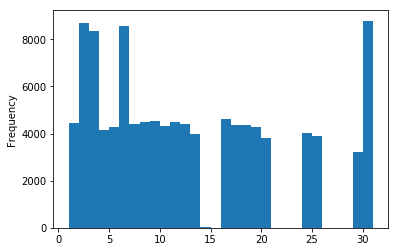

In [92]:
df['a_day'].plot.hist(bins=30)

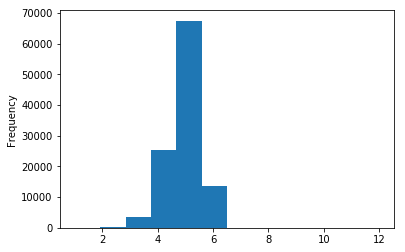

In [100]:
df['s_month'].plot.hist(bins=12)

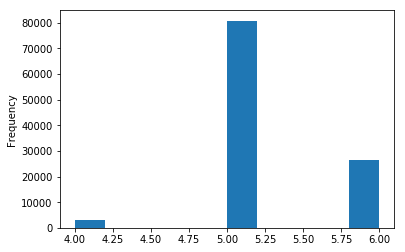

In [102]:
df['a_month'].plot.hist()

In [106]:
df['s_year'].value_counts()

2016    110465
2015        62
Name: s_year, dtype: int64

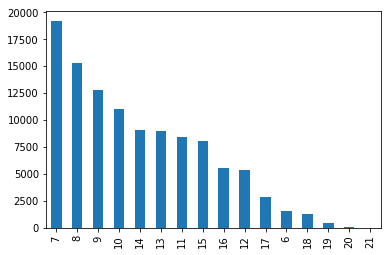

In [23]:
df['s_hour'].value_counts().plot(kind='bar')

In [25]:
df['s_hour'].describe()

count    110527.000000
mean         10.774517
std           3.216189
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: s_hour, dtype: float64

> Essas duas informações mostram que a maioria das consultas são marcadas apartir das 7 horas da manhã, a maior parte é marcada até às 10 horas da manhã e 75% das consultas são marcadas até às 13:00.

In [16]:
df['a_hour'].value_counts()

0    110527
Name: a_hour, dtype: int64

> Enquanto ScheduledDay possui o horário em que foi realizado o agendamento, AppointmentDay possui apenas o dia da consulta, o horário é igual a 00:00:00. É possível identificar o horário que são realizados os agendamentos mas não é possível fazer o mesmo para as consultas, pois geralmente as consultas são por ordem de chegada. Provavelmente os locais que são realizadas as consultas são em hospitais e não em clínicas particulares, pois o horário das consultas não é reservado. Como esta variável não incorpora nenhuma informação adicional então ela sera removida.

#### Remoção da variável 'a_hour'

In [19]:
df.drop('a_hour',inplace=True,axis=1)

## Diferença entre os dias de agendamento e da consulta

In [25]:
df['number_days'] = (df['AppointmentDay'].apply(lambda x:x.date())-df['ScheduledDay'].apply(lambda x:x.date()))/np.timedelta64(1,'D')

In [26]:
df[df['number_days'] < 0]['number_days'].value_counts()

-1.0    4
-6.0    1
Name: number_days, dtype: int64

> Estas informações mostram que em 5 datas a consulta foi realizada para antes do dia do agendamento, uma situação que não deveria acontecer. O sistema não deveria permitir que isso acontecesse. Uma possibilidade disso ter acontecido é que por exemplo, o paciente apareceu no consultório sem marcar, o sistema pode ter ficado offline e ter registrado apenas depois, o computador/servidor pode ter ficado com a data desatualizada. Não tenho conhecimento sobre as causas desses problemas. Este meu racioncínio leva a pensar que essas informações foram inseridas após a consulta, então eu acho que foram pacientes que compareceram às consultas. Por isso, a seguir iremos investigar esta informação.

In [27]:
df[df['number_days'] < 0]['No-show']

27033    Yes
55226    Yes
64175    Yes
71533    Yes
72362    Yes
Name: No-show, dtype: object

> Estas próximas informações de alguma forma validam o raciocínio. Desta forma, as datas das consultas serão atualizadas para o dia do agendamento.

In [33]:
df.loc[df['number_days'] < 0,'AppointmentDay'] = df.loc[df['number_days'] < 0,'ScheduledDay']

In [34]:
df['s_day'] = df['ScheduledDay'].apply(lambda x:x.day)
df['s_month'] = df['ScheduledDay'].apply(lambda x:x.month)
df['s_year'] = df['ScheduledDay'].apply(lambda x:x.year)
df['s_hour'] = df['ScheduledDay'].apply(lambda x:x.hour)

In [35]:
df['a_day'] = df['AppointmentDay'].apply(lambda x:x.day)
df['a_month'] = df['AppointmentDay'].apply(lambda x:x.month)
df['a_year'] = df['AppointmentDay'].apply(lambda x:x.year)
df['a_hour'] = df['AppointmentDay'].apply(lambda x:x.hour)

In [36]:
df['s_weekday'] = df['ScheduledDay'].apply(lambda x:x.day_name())
df['a_weekday'] = df['AppointmentDay'].apply(lambda x:x.day_name())

In [37]:
df['number_days'] = (df['AppointmentDay'].apply(lambda x:x.date())-df['ScheduledDay'].apply(lambda x:x.date()))/np.timedelta64(1,'D')

In [38]:
df[df['number_days'] < 0]['number_days'].value_counts()

Series([], Name: number_days, dtype: int64)

### Histogram Número de dias entre agendamento e consulta

In [41]:
df['number_days'].describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: number_days, dtype: float64

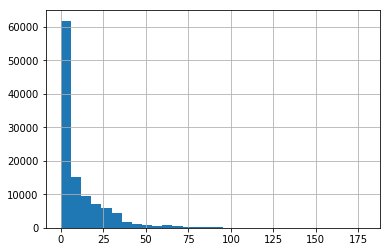

In [47]:
df['number_days'].hist(bins=30)

> É possível perceber que a maioria das consultas 

In [53]:
df['number_days'].value_counts()[0]/df['number_days'].value_counts().sum()

0.34894641128412063

> Aproximadamente 35% das consultas são marcadas para o mesmo dia do agendamento. 50% das consultas são marcadas para até 1 semana depois do agendamento. 75% das consultas são marcadas para até 2 semanas após o agendamento.

### Dias da semana

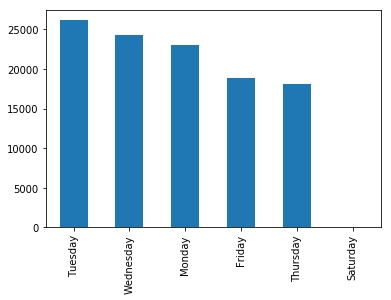

In [61]:
df['s_weekday'].value_counts().plot(kind='bar')

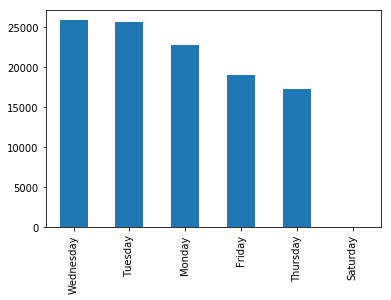

In [65]:
df['a_weekday'].value_counts().plot(kind='bar')

> Esses dois gráficos mostram que terça e quarta-feira são os dias da semana que mais são feitos os agendamentos e as consultas. Sábado foi o dia com menos agendamentos e consultas. Não houve também nenhuma consulta no domingo.

### Age

#### Remoção dos pacientes com idade negativa

In [77]:
df[df['Age'] < 0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,...,s_month,s_year,s_hour,a_day,a_month,a_year,s_weekday,a_weekday,number_days,a_hour


In [76]:
df.drop(df[df['Age'] < 0].index,inplace=True)

#### Idade acima de 100 anos

In [83]:
df[df['Age'] > 100]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,...,s_month,s_year,s_hour,a_day,a_month,a_year,s_weekday,a_weekday,number_days,a_hour
58014,976294799775439,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,...,5,2016,9,3,5,2016,Tuesday,Tuesday,0.0,0
63912,31963211613981,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,...,5,2016,9,19,5,2016,Monday,Thursday,3.0,0
63915,31963211613981,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,...,5,2016,9,19,5,2016,Monday,Thursday,3.0,0
68127,31963211613981,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,...,4,2016,14,16,5,2016,Friday,Monday,38.0,0
76284,31963211613981,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,...,5,2016,9,30,5,2016,Monday,Monday,0.0,0
90372,234283596548,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,...,5,2016,10,2,6,2016,Tuesday,Thursday,2.0,0
97666,748234579244724,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,...,5,2016,7,3,6,2016,Thursday,Friday,15.0,0


In [82]:
df[df['Age'] > 100]['PatientId'].unique()

array(['976294799775439', '31963211613981', '234283596548',
       '748234579244724'], dtype=object)

> Aparentemente não há nada de errado com as idade dos pacientes com mais de 100 anos. São apenas 4 pacientes e não foi encontrado nada de errado, são pessoas sem, a princípio, nenhum problema grave de saúde.

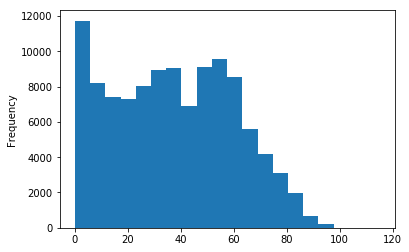

In [85]:
df['Age'].plot(kind='hist',bins=20)

In [84]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### Handcap

In [87]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

***Handcap*** indica se o paciente possui ou não alguma limitação, então os valores esperados são 'negativo' (0) ou 'positivo' (1). Há valores diferentes dos esperados. Levando em consideração que os valores também podem representar o grau de limitação do paciente, então vai se atribuir 1 para os valores que forem positivos e diferentes de 0 e 1.

#### Atualizando os valores diferentes de 0 e 1

In [97]:
df.loc[df['Handcap'] > 1,['Handcap']] = 1

In [98]:
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

In [28]:
#df.info()

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!